<a href="https://colab.research.google.com/github/Soumyaworks/Brand-Perception-using-Twitter-Sentiment-Analysis/blob/main/BrandComparator2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Colab Notebook with Explanation](https://colab.research.google.com/drive/1dYH5PAausru6lQy1dh5-aGC9S9DXO_bV?usp=sharing)

[Anvil App](https://NPFLBAAEVOXXUYZK.anvil.app/QED54JFBPJMZBQPITDWWVL75)

# Installing and importing

In [2]:
!git clone --depth=1 https://github.com/twintproject/twint.git
%cd twint
!pip3 install . -r requirements.txt
%cd ..
!pip install anvil-uplink
!pip install w3lib
# !pip install flair

Cloning into 'twint'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 47 (delta 3), reused 14 (delta 0), pack-reused 0
Unpacking objects: 100% (47/47), done.
/content/twint
Processing /content/twint
     |████████████████████████████████| 1.3MB 6.9MB/s 
     |████████████████████████████████| 266kB 20.2MB/s 
     |████████████████████████████████| 358kB 25.1MB/s 
     |████████████████████████████████| 143kB 26.6MB/s 
     |████████████████████████████████| 296kB 23.3MB/s 
     |████████████████████████████████| 296kB 26.3MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp37-none-any.whl size=13501 sha256=11c459f450de1485c69890b7a76775b65541ec38f46fd4c34016e4545e382b25
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
  Created wheel for googletransx: filename=googletransx-2.4.2-cp37-none-any.whl size=1597

In [3]:
import twint
import nest_asyncio
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re as regex
from w3lib.html import replace_entities
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from wordcloud import WordCloud, STOPWORDS
# Models
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
# import flair

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [4]:
# Link to Client
import anvil.server
import anvil.media
anvil.server.connect("SARV2AEUWRM7TWXOPT2BQATM-NPFLBAAEVOXXUYZK")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


# Text Processing Methods

In [5]:
def remove_by_regex(tweets, regexp):
        tweets.loc[:, 'tweet'].replace(regexp, '', inplace=True)
        return tweets

def remove_urls(tweets):
    return remove_by_regex(tweets, regex.compile(r"(http?\://|https?\://|www)[^\s]+[\s]?"))

def remove_usernames(tweets):
    return remove_by_regex(tweets, regex.compile(r"@\S+"))

def html_entity(tweet):
    return replace_entities(tweet)

def remove_punctuation(tweet):
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
    return regex.sub(pat, '', tweet)

def remove_emojis(tweets):
    emoji_pattern = regex.compile("["
                                    u"\U0001F600-\U0001F64F"  # emoticons
                                    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                    u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                    u"\U00002500-\U00002BEF"  # chinese characters
                                    u"\U00002702-\U000027B0"
                                    u"\U00002702-\U000027B0"
                                    u"\U000024C2-\U0001F251"
                                    u"\U0001f926-\U0001f937"
                                    u"\U00010000-\U0010ffff"
                                    u"\u2640-\u2642" 
                                    u"\u2600-\u2B55"
                                    u"\u200d"
                                    u"\u23cf"
                                    u"\u23e9"
                                    u"\u231a"
                                    u"\ufe0f"  # dingbats
                                    u"\u3030"
                                    "]+", regex.UNICODE)
    return remove_by_regex(tweets,emoji_pattern)

In [6]:
def subStrings(brand):
    temp=[]
    for i in range(len(brand)):
        for length in range(i+1,len(brand)+1):
            temp.append(brand[i: length]);
    return temp

# Model Methods

In [7]:
# MODELS

# VADER
# No code required

# TextBlob

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Flair
# flair_sentiment = flair.models.TextClassifier.load('en-sentiment')
# def get_sentiment(text):
#     sentObj = flair.data.Sentence(text)
#     flair_sentiment.predict(sentObj)
#     total_sentiment = sentObj.labels
#     return str(total_sentiment[0]).split()[0]

# BERT, GPT3 and others
#

# Visualisation Methods

In [8]:
def wordcloud(brand1,df1,brand2,df2):
    stopwords = set(STOPWORDS)
    tags=[]
    tags.extend(brand1.split())
    tags.extend(brand2.split())
    
    tags.extend(subStrings("".join(brand1.split())))
    tags.extend(subStrings("".join(brand2.split())))

    stopwords.update(tags)

    plt.figure(figsize=(10, 8), dpi=150)

    plt.subplot(2, 2, 1)
    pos = df1.loc[df1['sentiment_type'] == 'POSITIVE']
    poswords=" ".join(word for word in pos.tweet if brand1 not in word)
    wordcloud1 = WordCloud(stopwords=stopwords).generate(poswords)
    plt.imshow(wordcloud1, interpolation='bilinear')
    plt.title(str.title(brand1)+' positive')
    plt.axis("off")

    plt.subplot(2, 2, 2)
    pos = df2.loc[df2['sentiment_type'] == 'NEGATIVE']
    poswords=" ".join(word for word in pos.tweet if brand2 not in word)
    wordcloud2 = WordCloud(stopwords=stopwords).generate(poswords)
    plt.imshow(wordcloud2, interpolation='bilinear')
    plt.title(str.title(brand2)+' negative')
    plt.axis("off")

    plt.subplot(2, 2, 3)
    pos = df1.loc[df1['sentiment_type'] == 'NEGATIVE']
    poswords=" ".join(word for word in pos.tweet if brand1 not in word)
    wordcloud3 = WordCloud(stopwords=stopwords).generate(poswords)
    plt.imshow(wordcloud3, interpolation='bilinear')
    plt.title(str.title(brand1)+' negative')
    plt.axis("off")

    plt.subplot(2, 2, 4)
    pos = df2.loc[df2['sentiment_type'] == 'POSITIVE']
    poswords=" ".join(word for word in pos.tweet if brand2 not in word)
    wordcloud4 = WordCloud(stopwords=stopwords).generate(poswords)
    plt.imshow(wordcloud4, interpolation='bilinear')
    plt.title(str.title(brand2)+' positive')
    plt.axis("off")
    plt.savefig('cloud.png')
    mediaobj = anvil.media.from_file('cloud.png')
    return mediaobj

In [9]:
def bargraph(brand1,df1,brand2,df2):
    plt.figure(figsize=(15, 8), dpi=100)
    plt.subplot(1, 2, 1)
    df1.sentiment_type.value_counts().plot(kind='bar',title=str.title(brand1)+' tweets')
    plt.subplot(1, 2, 2)
    df2.sentiment_type.value_counts().plot(color='brown',kind='bar',title=str.title(brand2)+' tweets')
    plt.savefig('bar.png')
    mediaobj = anvil.media.from_file('bar.png')
    return mediaobj

In [10]:
def donutchart(brand1,df1,brand2,df2):
    fig, ax = plt.subplots()
    size = 0.3
    val1=df1.sentiment_type.value_counts().to_numpy(dtype='float32')
    val2=df2.sentiment_type.value_counts().to_numpy(dtype='float32')
    labels=['Positive','Neutral','Negative']
    ax.pie(val1, labels=labels, radius=1, wedgeprops=dict(width=size, edgecolor='w'),colors=['darkgreen','darkblue','darkred'])
    ax.pie(val2, radius=1-size, wedgeprops=dict(width=size, edgecolor='w'),colors=['green','blue','firebrick'])
    ax.set(aspect="equal", title=str.title(brand1)+' (Outer) vs '+str.title(brand2)+' (Inner)')
    fig = plt.gcf()
    fig.set_size_inches(8,8)
    fig.dpi=150
    plt.savefig('donut.png')
    mediaobj = anvil.media.from_file('donut.png')
    return mediaobj

In [11]:
def piechart(brand1,brand2,posval1,negval1,posval2,negval2,pos1,neg1,pos2,neg2):
    plt.subplot(1, 2, 1)    
    labels = ['Positive ['+str(posval1)+'%]' , 'Negative ['+str(negval1)+'%]']
    sizes = [pos1, neg1]
    colors = ['chartreuse','red']
    patches, texts = plt.pie(sizes,colors=colors, startangle=90)
    plt.style.use('default')
    plt.legend(labels)
    plt.title(str.title(brand1)+" Positive vs Negative")
    plt.axis('equal')
    plt.subplot(1, 2, 2)
    labels = ['Positive ['+str(posval2)+'%]' , 'Negative ['+str(negval2)+'%]']
    sizes = [pos2, neg2]
    colors = ['chartreuse','red']
    patches, texts = plt.pie(sizes,colors=colors, startangle=90)
    plt.style.use('default')
    plt.legend(labels)
    plt.title(str.title(brand2)+" Positive vs Negative")
    plt.axis('equal')
    fig = plt.gcf()
    fig.set_size_inches(10,5)
    plt.savefig('pie.png')
    mediaobj = anvil.media.from_file('pie.png')
    return mediaobj

# Comparator Code

In [12]:
@anvil.server.callable
def comparator2(brand1, brand2, limit, model):

    brand1=brand1.lower().strip()
    brand2=brand2.lower().strip()
    print(brand1+' vs '+brand2+' started')

    # Tweet extraction
    twint.storage.panda.clean()
    c = twint.Config()
    c.Search = brand1
    c.Lang='en'
    c.Hide_output = True
    c.Limit = limit
    c.Filter_retweets = True
    c.Pandas = True
    twint.run.Search(c)

    df1 = twint.storage.panda.Tweets_df
    df1 = df1[['username', 'name', 'id', 'language', 'tweet']]
    twint.storage.panda.clean()

    c.Search = brand2
    twint.run.Search(c)

    df2 = twint.storage.panda.Tweets_df
    df2 = df2[['username', 'name', 'id', 'language', 'tweet']]
    twint.storage.panda.clean()
    
    # Processing tweets
    df1 = df1.dropna(how = 'all')
    df2 = df2.dropna(how = 'all')

    df1.drop(df1[df1['language'] != 'en'].index, inplace = True)
    df2.drop(df2[df2['language'] != 'en'].index, inplace = True)

    df1.drop_duplicates(inplace = True)
    df2.drop_duplicates(inplace = True)

    criterion1 = df1['username'].map(lambda x: brand1 not in x)
    criterion2 = df1['name'].map(lambda x: brand1 not in x)
    df1 = df1[criterion1 & criterion2]

    criterion1 = df2['username'].map(lambda x: brand2 not in x)
    criterion2 = df2['name'].map(lambda x: brand2 not in x)
    df2 = df2[criterion1 & criterion2]

    df1.drop(columns = ['id','username', 'name', 'language'], inplace = True)
    df2.drop(columns = ['id','username', 'name', 'language'], inplace = True)

    stop=stopwords.words('english')
    df1 = remove_usernames(df1)
    df1 = remove_urls(df1)
    df1 = df1.applymap(html_entity)
    df1 = df1.applymap(lambda s:s.lower())
    df1['tweet'].apply(lambda sentence: [word for word in sentence if word not in stop])
    df1 = df1.applymap(remove_punctuation)
    df1 = remove_emojis(df1)

    df2 = remove_usernames(df2)
    df2 = remove_urls(df2)
    df2 = df2.applymap(html_entity)
    df2 = df2.applymap(lambda s:s.lower())
    df2['tweet'].apply(lambda sentence: [word for word in sentence if word not in stop])
    df2 = df2.applymap(remove_punctuation)
    df2 = remove_emojis(df2)

    # Number of tweets
    print('Size of dataset for','1st brand: '+str(df1.shape[0]),'2nd brand: '+str(df2.shape[0]),sep='\n')
    numoftweets=df1.shape[0]+df2.shape[0]

    # Feeding into model
    if model==1:
        # VADER
        analyzer=SentimentIntensityAnalyzer()
        df1['overall']=[analyzer.polarity_scores(x)['compound'] for x in df1['tweet']]
        df2['overall']=[analyzer.polarity_scores(x)['compound'] for x in df2['tweet']]

        df1['sentiment_type']=''
        df2['sentiment_type']=''

        df1.loc[df1.overall>0,'sentiment_type']='POSITIVE'
        df1.loc[df1.overall==0,'sentiment_type']='NEUTRAL'
        df1.loc[df1.overall<0,'sentiment_type']='NEGATIVE'

        df2.loc[df2.overall>0,'sentiment_type']='POSITIVE'
        df2.loc[df2.overall==0,'sentiment_type']='NEUTRAL'
        df2.loc[df2.overall<0,'sentiment_type']='NEGATIVE'
    elif model==2:
        # TEXTBLOB
        df1['polarity'] = df1['tweet'].apply(get_polarity)
        df2['polarity'] = df2['tweet'].apply(get_polarity)

        df1['sentiment_type']=''
        df2['sentiment_type']=''

        df1.loc[df1.polarity>0,'sentiment_type']='POSITIVE'
        df2.loc[df2.polarity>0,'sentiment_type']='POSITIVE'

        df1.loc[df1.polarity==0,'sentiment_type']='NEUTRAL'
        df2.loc[df2.polarity==0,'sentiment_type']='NEUTRAL'

        df1.loc[df1.polarity<0,'sentiment_type']='NEGATIVE'
        df2.loc[df2.polarity<0,'sentiment_type']='NEGATIVE'
    elif model==3:
        # FLAIR (disabled - no neutral tweets)
        # df1['sentiment_type']=''
        # df2['sentiment_type']=''
        # df1['sentiment_type']=df1['tweet'].apply(get_sentiment)
        # df2['sentiment_type']=df2['tweet'].apply(get_sentiment)
        pass
    elif model==4:
        # BERT, GPT3, Others
        pass
    else:
        # Error
        print("Recheck code")
    # Saving tweets
    df1.to_excel('tweets1.xlsx',index=False)
    df2.to_excel('tweets2.xlsx',index=False)

    # Statistics
    pos1=df1.sentiment_type.value_counts()['POSITIVE']
    neg1=df1.sentiment_type.value_counts()['NEGATIVE']
    total=pos1+neg1+df1.sentiment_type.value_counts()['NEUTRAL']

    posval1=round(pos1*100/total,2)
    negval1=round(neg1*100/total,2)

    pos2=df1.sentiment_type.value_counts()['POSITIVE']
    neg2=df2.sentiment_type.value_counts()['NEGATIVE']
    total=pos2+neg2+df1.sentiment_type.value_counts()['NEUTRAL']

    posval2=round(pos2*100/total,2)
    negval2=round(neg2*100/total,2)

    objlist=[]
    objlist.append(wordcloud(brand1,df1,brand2,df2))
    objlist.append(bargraph(brand1,df1,brand2,df2))
    objlist.append(donutchart(brand1,df1,brand2,df2))
    objlist.append(piechart(brand1,brand2,posval1,negval1,posval2,negval2,pos1,neg1,pos2,neg2))

    ratio1=round(posval1/negval1,4)
    ratio2=round(posval2/negval2,4)

    winner=brand1 if ratio1>ratio2 else brand2

    del df1
    del df2
    
    return winner,objlist,numoftweets

# Comparator Call

amazon vs flipkart started
Size of dataset for
1st brand: 559
2nd brand: 1473


KeyboardInterrupt: ignored

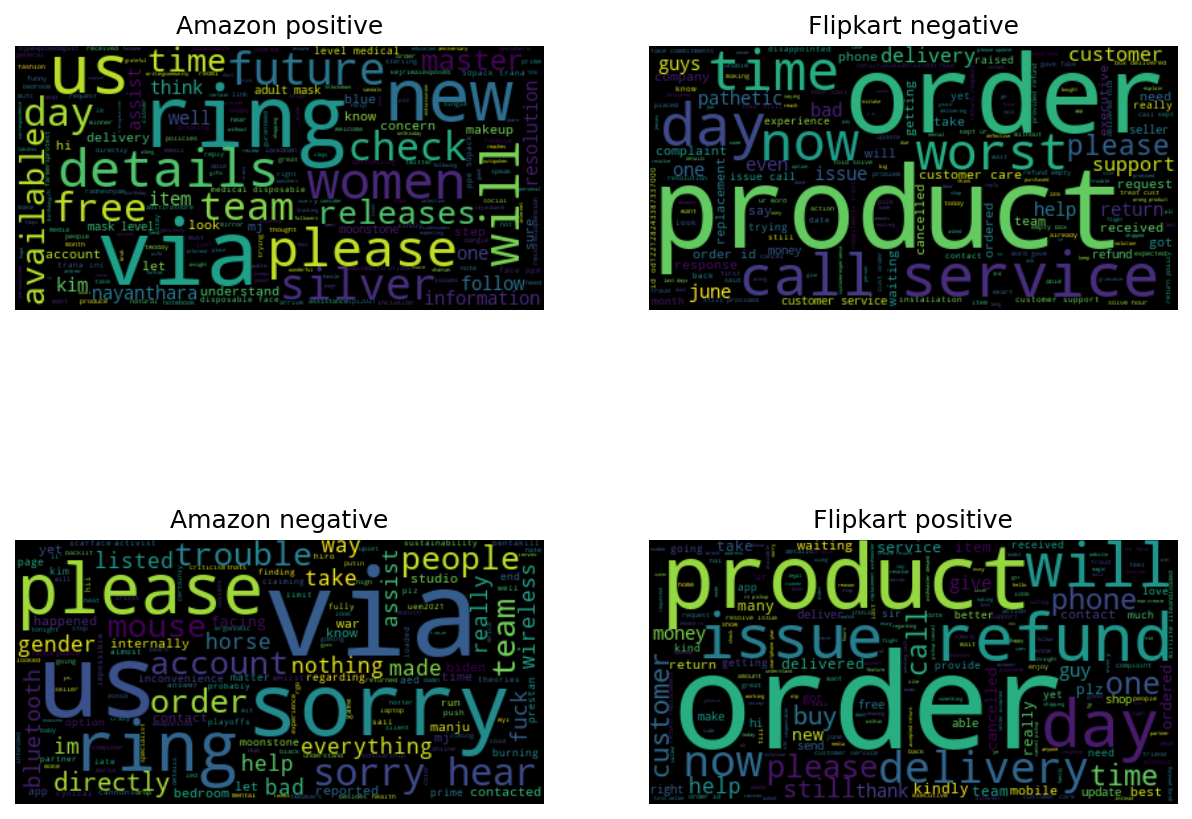

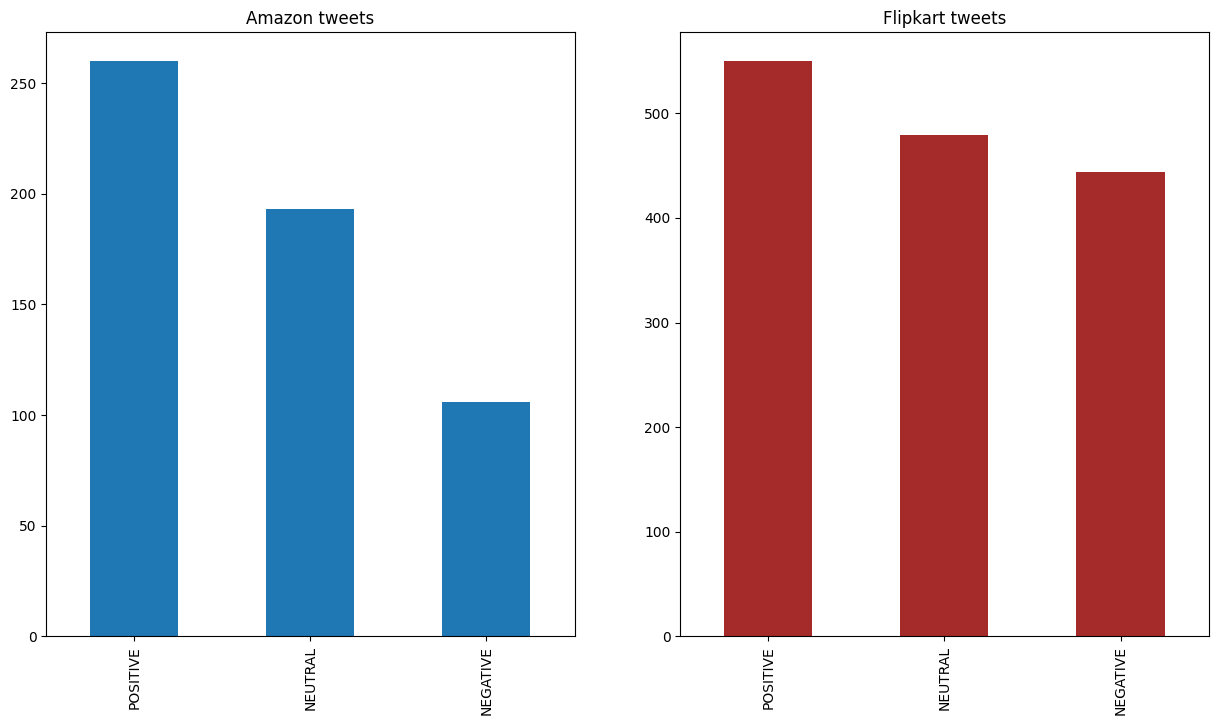

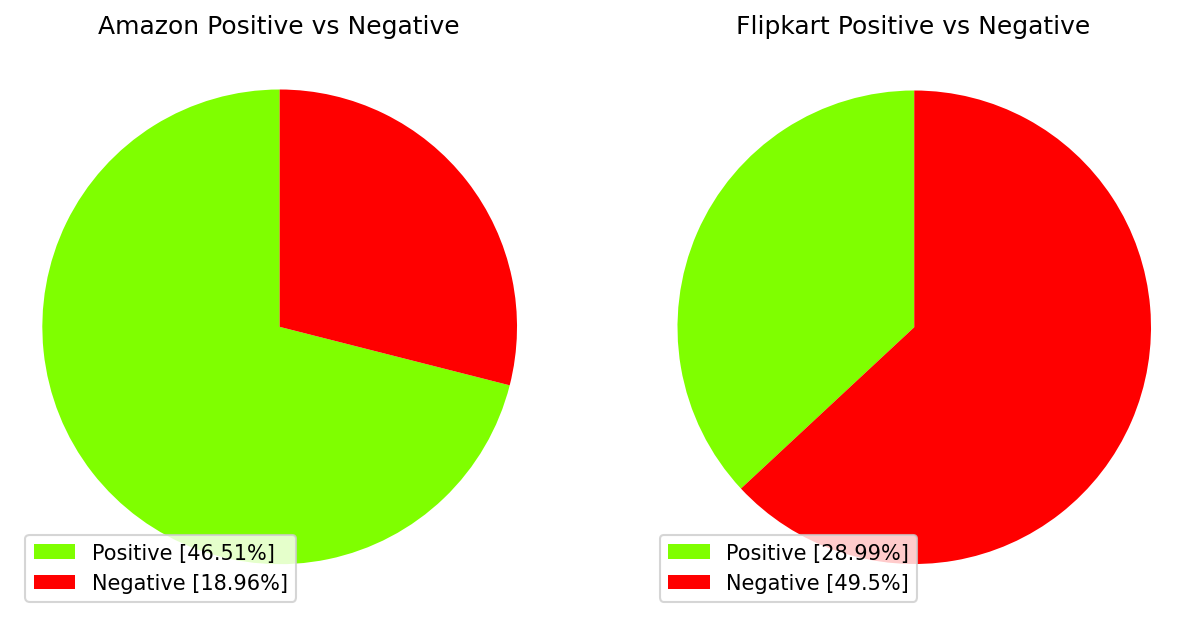

In [13]:
nest_asyncio.apply()
anvil.server.wait_forever()